# CODE TO TRAIN A SIMPLE PERCEPTRON 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

speed_data = pd.read_csv("speed_decision_data.csv")

In [3]:
speed_data.head()

,1 - Distance From Bump,Height of Bump,Speed
0,0.575374,0.680337,0
1,0.376002,0.278661,1
2,0.973890,0.741585,0
3,0.310378,0.342374,1
4,0.109521,0.268304,1


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

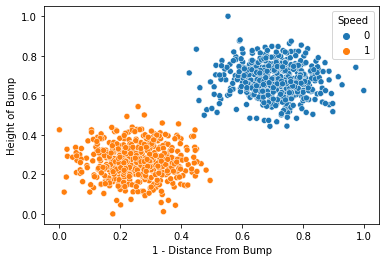

In [4]:
sns.scatterplot(speed_data['1 - Distance From Bump'], speed_data['Height of Bump'], hue = speed_data['Speed'])

In [5]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [6]:
y_train = speed_data['Speed']

In [7]:
# Adam optimizer is a specialized gradient-descent algorithm that uses the gradient to traint the network.
# Adam optimizer uses backpropagation algorithm to first compute the gradient of the function. 

In [8]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
32/32 - 2s - loss: 0.8701
Epoch 2/100
32/32 - 0s - loss: 0.8554
Epoch 3/100
32/32 - 0s - loss: 0.8420
Epoch 4/100
32/32 - 0s - loss: 0.8301
Epoch 5/100
32/32 - 0s - loss: 0.8189
Epoch 6/100
32/32 - 0s - loss: 0.8087
Epoch 7/100
32/32 - 0s - loss: 0.7990
Epoch 8/100
32/32 - 0s - loss: 0.7903
Epoch 9/100
32/32 - 0s - loss: 0.7820
Epoch 10/100
32/32 - 0s - loss: 0.7743
Epoch 11/100
32/32 - 0s - loss: 0.7675
Epoch 12/100
32/32 - 0s - loss: 0.7608
Epoch 13/100
32/32 - 0s - loss: 0.7545
Epoch 14/100
32/32 - 0s - loss: 0.7485
Epoch 15/100
32/32 - 0s - loss: 0.7429
Epoch 16/100
32/32 - 0s - loss: 0.7375
Epoch 17/100
32/32 - 0s - loss: 0.7323
Epoch 18/100
32/32 - 0s - loss: 0.7274
Epoch 19/100
32/32 - 0s - loss: 0.7225
Epoch 20/100
32/32 - 0s - loss: 0.7178
Epoch 21/100
32/32 - 0s - loss: 0.7131
Epoch 22/100
32/32 - 0s - loss: 0.7086
Epoch 23/100
32/32 - 0s - loss: 0.7041
Epoch 24/100
32/32 - 0s - loss: 0.6996
Epoch 25/100
32/32 - 0s - loss: 0.6953
Epoch 26/100
32/32 - 0s - loss: 0.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [12]:
# make a prediction
#y_train_predict = model.predict_classes(X_train)  Deprecated syntax, although it was a lot simpler...
y_train_predict = (model.predict(X_train) > 0.5).astype("int32")

<AxesSubplot:>

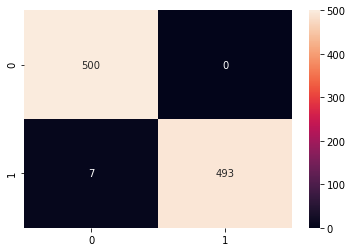

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


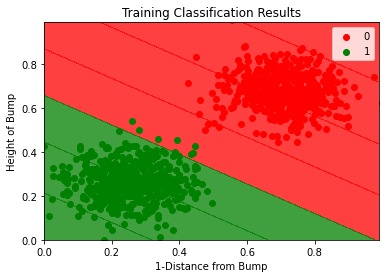

In [14]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train.values, y_train.values

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [15]:
weights, biases = model.layers[0].get_weights()

In [16]:
weights

array([[-1.2814081],
       [-1.907792 ]], dtype=float32)

In [17]:
biases

array([1.2533766], dtype=float32)